In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/OFDM/dataset_1.csv') # dataset1.csv

In [3]:
df.head(5)

,Real_Input,Imag_Input,Real_FFT_Output,Imag_FFT_Output
0,0.94868,-0.31623,0.95693,-0.49522
1,0.31623,0.94868,0.18167,1.00430
2,0.31623,0.94868,0.36292,0.82532
3,0.31623,0.31623,0.32464,0.32963
4,0.31623,0.94868,0.37893,1.02740


In [4]:
df.shape

(64000, 4)

In [5]:
import os
!pip install tensorflow
!pip install git+https://github.com/tensorflow/docs
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
print(f"Tensorflow version: {tf.version.VERSION}")

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-p3zvkf14
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-p3zvkf14
  Resolved https://github.com/tensorflow/docs to commit 98fa05949ba64f95c4df6565ea915a002a240289
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.7.15.51478-py3-none-any.whl size=182586 sha256=809566efb41dca25b3605d0d338d6800251ed9479d6c8545cf8316a2864a9cd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-5lqzm61s/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs
Tensorflow version: 2.17.0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [7]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [8]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.

In [9]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [10]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scale the features and targets
X = df.iloc[:, :2].values  # Input features (real and imaginary parts)
y = df.iloc[:, 2:].values   # Output targets (real and imaginary parts)

scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create the model with a single dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(y_train.shape[1], use_bias=False, activation='linear', input_shape=(X_train.shape[1],))
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Add Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3286 - mae: 0.4807 - val_loss: 0.0625 - val_mae: 0.2138
Epoch 2/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0381 - mae: 0.1610 - val_loss: 0.0059 - val_mae: 0.0621
Epoch 3/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0047 - mae: 0.0545 - val_loss: 0.0035 - val_mae: 0.0468
Epoch 4/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 5/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 6/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 7/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 8/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0034 - mae: 0.0466 - val_loss: 0.0034 - val_mae: 0.0467
Epoch 9/100
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss:

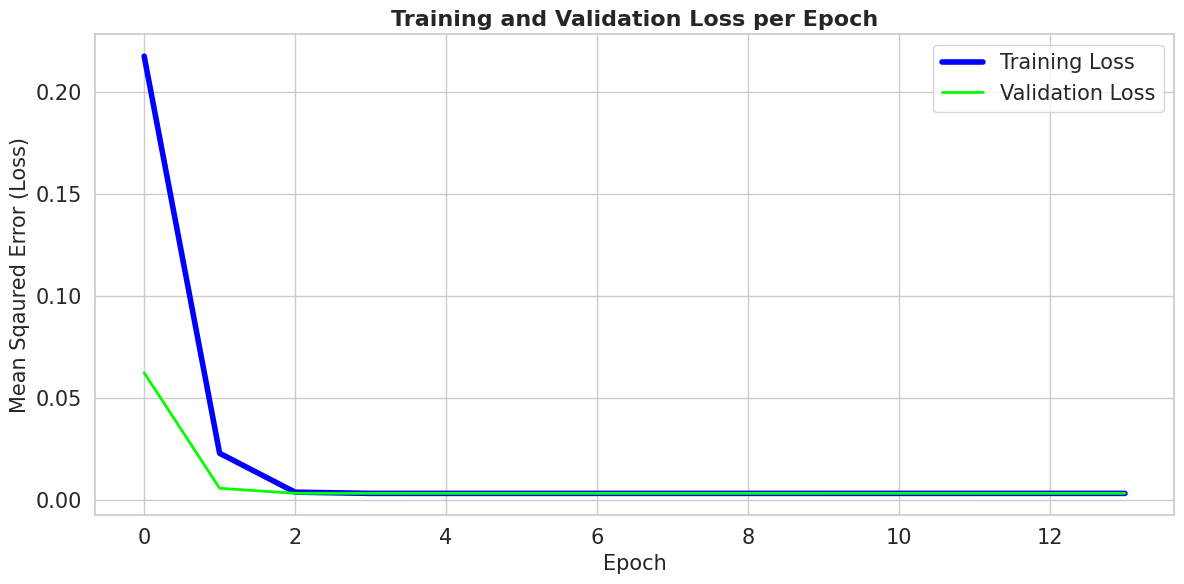

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style='whitegrid')

# Create a larger figure
plt.figure(figsize=(12, 6))

# Plot the loss values
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=4)
plt.plot(history.history['val_loss'], label='Validation Loss', color='lime', linewidth=2)

# Add titles and labels
plt.title('Training and Validation Loss per Epoch', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Mean Sqaured Error (Loss)', fontsize=15)

# Customize the legend
plt.legend(fontsize=15)
plt.grid(True)

# Adjust the ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('loss_plot.png',dpi=350)

In [12]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values for comparison
predictions_inv = scaler_y.inverse_transform(predictions)
y_test_inv = scaler_y.inverse_transform(y_test)


400/400 - 0s - 1ms/step - loss: 0.0034 - mae: 0.0468
Test Loss: 0.00344282784499228, Test MAE: 0.0468156524002552
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [13]:
print(y_train.shape)
print(y_test.shape)


(51200, 2)
(12800, 2)


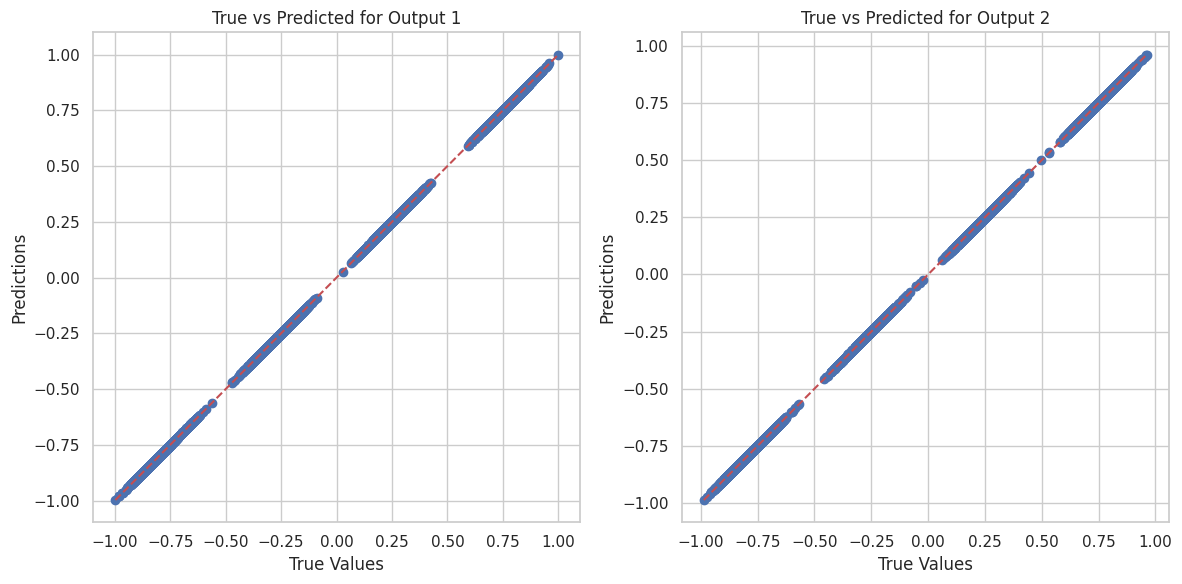

In [14]:
# Scatter plot of true vs predictions
plt.figure(figsize=(12, 6))
for i in range(y.shape[1]):
    plt.subplot(1, y.shape[1], i + 1)
    plt.scatter(y_test[:, i], y_test[:, i])
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'True vs Predicted for Output {i + 1}')
    plt.plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'r--')  # Diagonal line
plt.tight_layout()
plt.show()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Mean Error: -0.0089
Median Error: -0.0090
Standard Deviation of Error: 0.0579


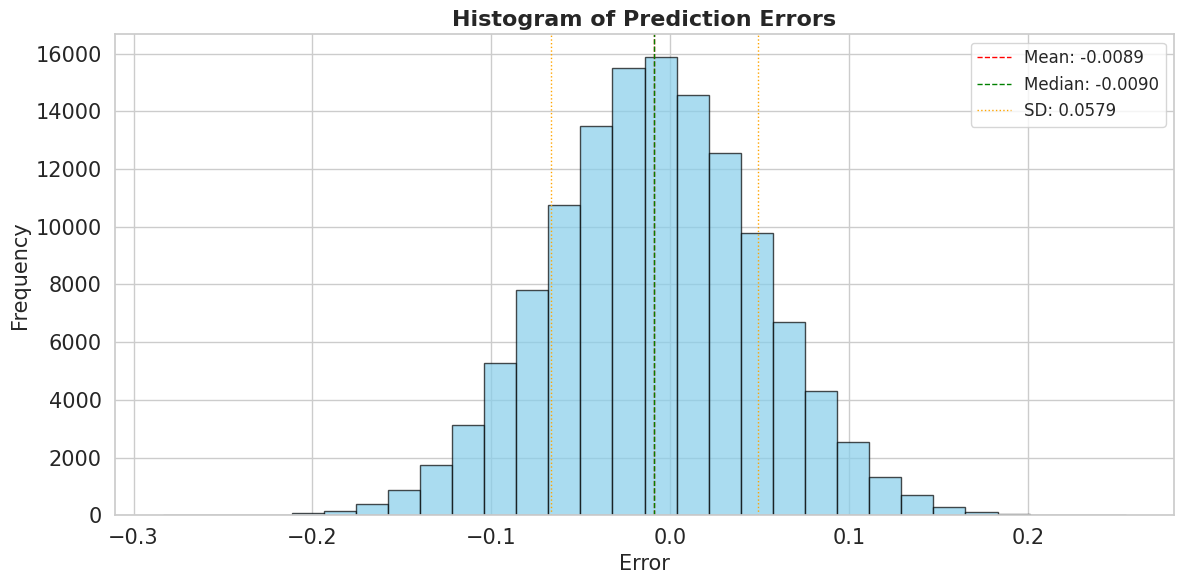

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
sns.set(style='whitegrid')

# Assuming you have your complete dataset predictions and true values
predictions = model.predict(X_scaled)

# Calculate errors for the entire dataset
errors = y_scaled - predictions  # Calculate errors for the entire dataset

# Calculate mean, median, and standard deviation
mean_error = np.mean(errors)
median_error = np.median(errors)
std_dev_error = np.std(errors)

# Print the calculated values
print(f'Mean Error: {mean_error:.4f}')
print(f'Median Error: {median_error:.4f}')
print(f'Standard Deviation of Error: {std_dev_error:.4f}')

# Create a larger figure for the histogram
plt.figure(figsize=(12, 6))

# Plot histogram for the errors
plt.hist(errors.flatten(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add titles and labels for the histogram
plt.title('Histogram of Prediction Errors', fontsize=16, fontweight='bold')
plt.xlabel('Error', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Add text annotations for mean, median, and std deviation
plt.axvline(mean_error, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_error:.4f}')
plt.axvline(median_error, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_error:.4f}')
plt.axvline(mean_error + std_dev_error, color='orange', linestyle='dotted', linewidth=1, label=f'SD: {std_dev_error:.4f}')
plt.axvline(mean_error - std_dev_error, color='orange', linestyle='dotted', linewidth=1)

# Customize legend
plt.legend(fontsize=12)

# Adjust ticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Show the histogram
plt.tight_layout()
plt.show()

# Save the histogram plot
plt.savefig('error_histogram.png', dpi=350)


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


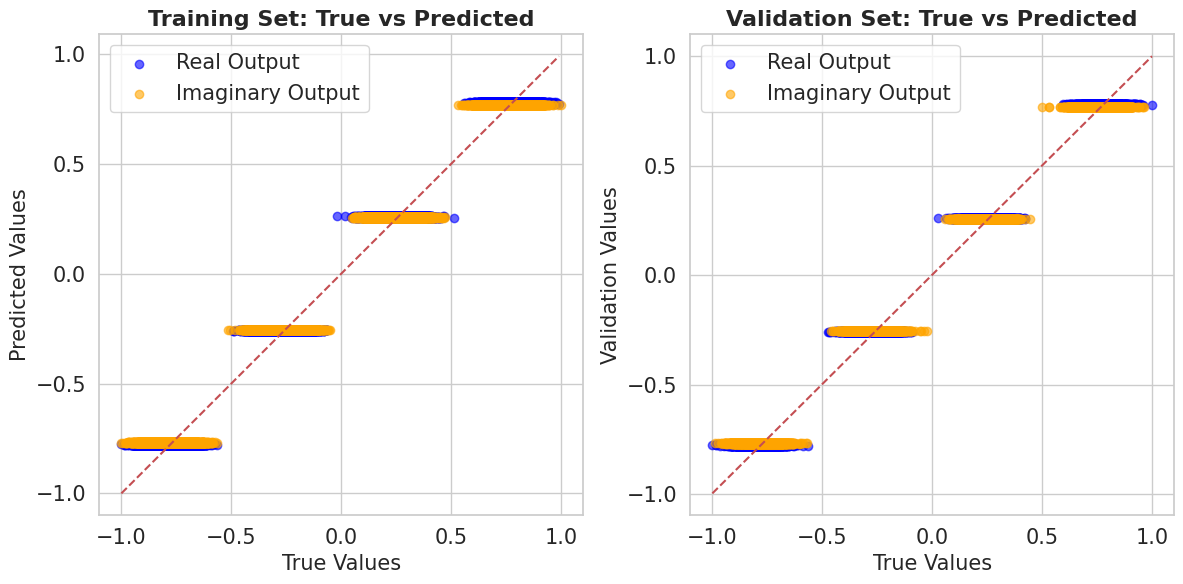

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on both training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Set the style for the scatter plots
sns.set(style='whitegrid')

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Scatter plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train[:, 0], train_predictions[:, 0], color='blue', alpha=0.6, label='Real Output')
plt.scatter(y_train[:, 1], train_predictions[:, 1], color='orange', alpha=0.6, label='Imaginary Output')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'r--')  # Diagonal line
plt.title('Training Set: True vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.yticks(np.arange(-1, 1.5, 0.5))

# Scatter plot for testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 0], test_predictions[:, 0], color='blue', alpha=0.6, label='Real Output')
plt.scatter(y_test[:, 1], test_predictions[:, 1], color='orange', alpha=0.6, label='Imaginary Output')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'r--')  # Diagonal line
plt.title('Validation Set: True vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Validation Values', fontsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(-1, 1.5, 0.5))
plt.yticks(np.arange(-1, 1.5, 0.5))


# Adjust layout and show plot
plt.tight_layout()
plt.show()
plt.savefig('true_vs_predicted.png', dpi=350)

# Training time

In [ ]:
import time

# Start timing
start_time = time.time()

# Fit your model (replace `model.fit` with your actual training method)
model.fit(X_train, y_train, epochs=14, batch_size=64)

# End timing
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


Epoch 1/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035 - mae: 0.0469
Epoch 2/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 3/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0035 - mae: 0.0469
Epoch 4/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0035 - mae: 0.0469
Epoch 5/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 6/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 7/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 8/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 9/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 10/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 11/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 12/14
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0035 - mae: 0.0469
Epoch 13/14
800/800 ━━━━━

In [ ]:
# Start timing
start_time = time.time()

# Make predictions (replace `model.predict` with your actual inference method)
predictions = model.predict(X_test)

# End timing
end_time = time.time()

# Calculate inference time
inference_time = end_time - start_time
print(f"Inference time: {inference_time:.2f} seconds")


400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Inference time: 0.65 seconds


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and predictions are defined (true values and model predictions)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate R²
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0034
Mean Absolute Error (MAE): 0.0468
R-squared (R²): 0.9897
